# Seminar 0 (Linear models, Optimization)

In this seminar you will implement a simple linear classifier using numpy and your brain.

## Two-dimensional classification

/home/main/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')
/home/main/anaconda2/envs/python3/lib/python3.5/site-packages/matplotlib/font_manager.py:273: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  warnings.warn('Matplotlib is building the font cache using fc-list. This may take a moment.')


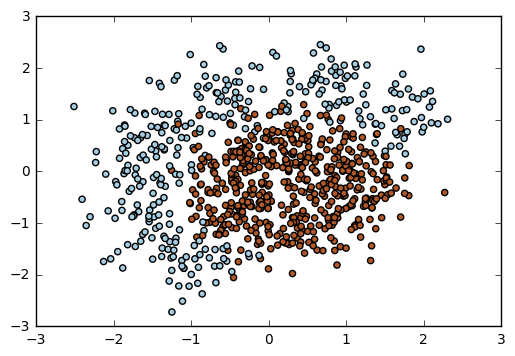

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import random
from IPython import display
from sklearn import datasets, preprocessing

(X, y) = datasets.make_circles(n_samples=1024, shuffle=True, noise=0.2, factor=0.4)
ind = np.logical_or(y==1, X[:,1] > X[:,0] - 0.5)
X = X[ind,:]
m = np.array([[1, 1], [-2, 1]])
X = preprocessing.scale(X)
y = y[ind]
y = 2*y - 1
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.show()

In [2]:
h = 0.01
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
def visualize(X, y, w, loss, n_iter):
    plt.clf()
    Z = classify(np.c_[xx.ravel(), yy.ravel()], w)
    Z = Z.reshape(xx.shape)
    plt.subplot(1,2,1)
    plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.subplot(1,2,2)
    plt.plot(loss)
    ymin, ymax = plt.ylim()
    plt.ylim(0, ymax)
    display.clear_output(wait=True)
    display.display(plt.gcf())

**Your task starts here**

Implement classification with hinge loss.
You should use up to the second order terms of X for your classifier, as provided by function **expand**.

In [79]:
def expand(X):
    X_ = np.zeros((X.shape[0], 6))
    X_[:,0:2] = X
    X_[:,2:4] = X**2
    X_[:,4] = X[:,0] * X[:,1]
    X_[:,5] = 1
    return X_

def classify(X, w):
    y = np.dot(expand(X), w)
    return np.sign(y)

def compute_loss(X, y, w):
    y_preds = classify(X, w)
    loss = 1.0 - y_preds * y
    loss = np.maximum(0, loss)
    return np.mean(loss)

def compute_grad(X, y, w):
    X = expand(X)
    y_preds = np.dot(X, w)
    grads = np.zeros_like(X)
    l = X.shape[0]
    mask = y_preds*y < 1
    grads[mask, :] = -X[mask, :]*y[mask, None]
    return np.mean(grads, axis=0)

Find an optimal learning rate for gradient descent for given batch size. 
You can see the example of correct output below this cell before you run it.

**Don't change the batch size!**

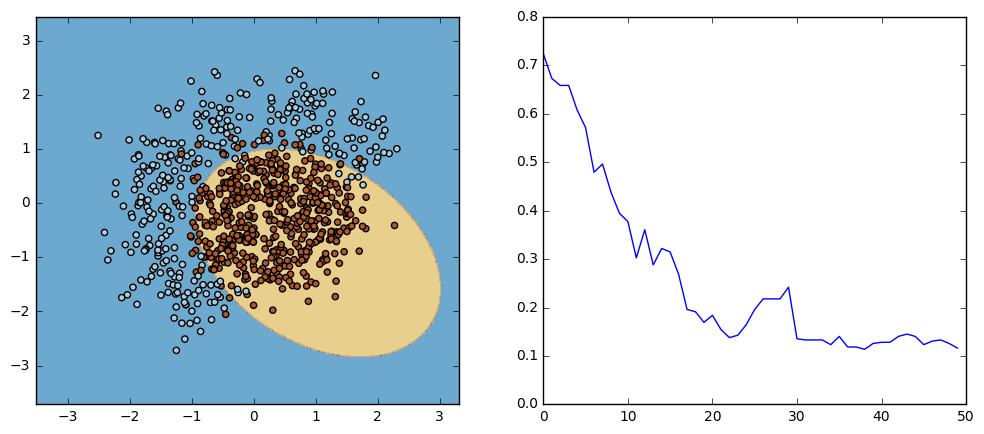

W= [ 0.87730068 -0.73665609 -0.61234814 -0.64689165 -0.43214903  1.3125    ] | loss= 0.116222760291


In [95]:
w = np.array([1,0,0,0,0,0])

alpha = 0.15 # learning rate

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    w = w - alpha * compute_grad(X[ind,:], y[ind], w)

visualize(X, y, w, loss, n_iter)
plt.clf()
print("W=", w, "| loss=", loss[-1])

Implement gradient descent with momentum and test it's performance for different learning rate and momentum values.

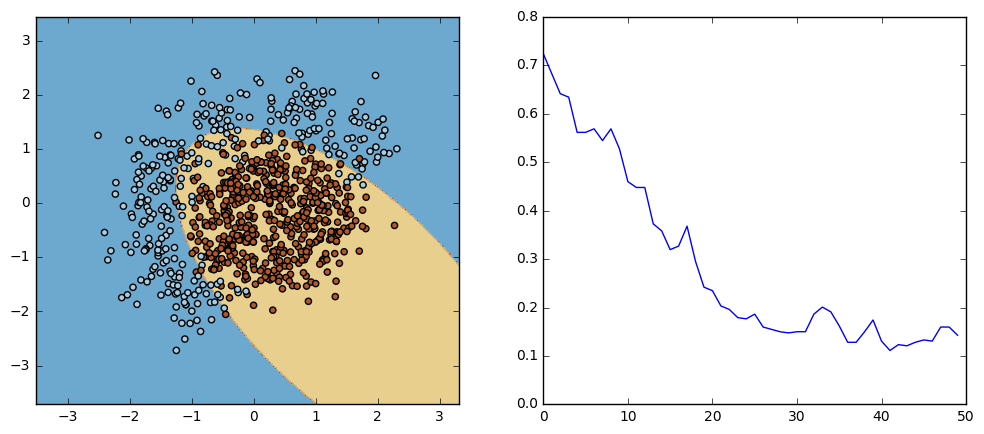

W= [ 0.61506965 -0.56831876 -0.56506214 -0.45351092 -0.65307624  1.62066287] | loss= 0.142857142857


In [96]:
w = np.array([1,0,0,0,0,0])
v = np.array([0,0,0,0,0,0])

alpha = 0.15 # learning rate
mu    = 0.10 # momentum

n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    #update w here
    v = alpha * compute_grad(X[ind,:], y[ind], w) + mu * v 
    w = w - v

visualize(X, y, w, loss, n_iter)
plt.clf()
print("W=", w, "| loss=", loss[-1])

Implement RMSPROP algorithm


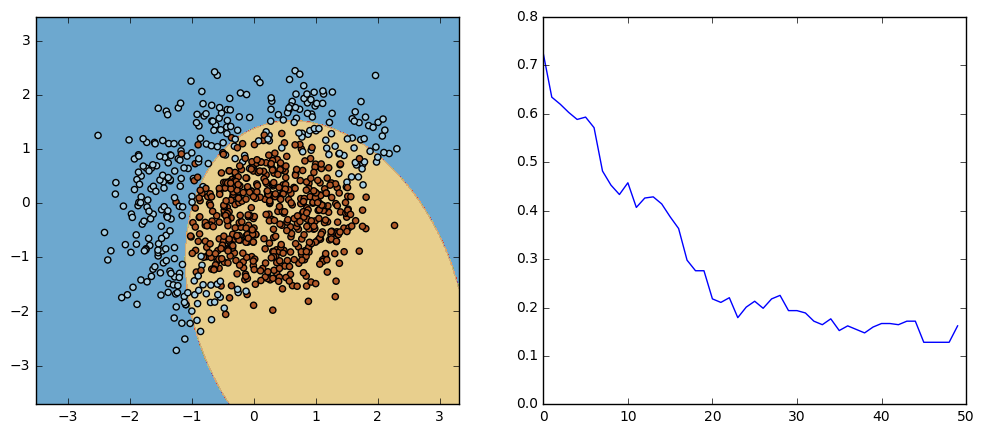

W= [ 0.98908315 -0.73738121 -0.57334501 -0.25362204 -0.18570454  1.50414096] | loss= 0.162227602906


In [97]:
w = np.array([1,0,0,0,0,0])
ms = 0

alpha = 0.15 # learning rate
gamma = 0.15
eps   = 0.001


n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    #update w here
    grad = compute_grad(X[ind,:], y[ind], w) 
    ms = gamma * ms + (1.0 - gamma) * np.linalg.norm(grad, 2)
    w = w - alpha / np.sqrt(ms + eps) * grad

visualize(X, y, w, loss, n_iter)
plt.clf()
print("W=", w, "| loss=", loss[-1])

Which optimization method do you consider the best? Type your answer in the cell below

# Bonus quest 
try the same thing for Adagrad and anything else you find suitable


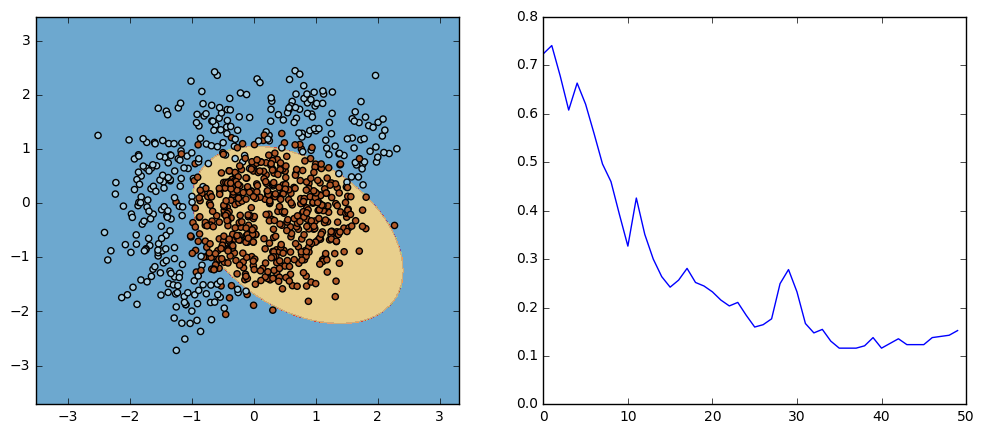

W= [ 0.74534774 -0.52280663 -0.79207432 -0.84843113 -0.65613686  1.49927865] | loss= 0.152542372881


In [98]:
# Adam = RMSProp + Momentum

w = np.array([1,0,0,0,0,0])
v = np.array([0,0,0,0,0,0])
ms = 0

alpha = 0.15 # learning rate
mu    = 0.15 # momentum
gamma = 0.15
eps   = 0.001


n_iter = 50
batch_size = 4
loss = np.zeros(n_iter)
plt.figure(figsize=(12,5))
for i in range(n_iter):
    ind = random.sample(range(X.shape[0]), batch_size)
    loss[i] = compute_loss(X, y, w)
    visualize(X[ind,:], y[ind], w, loss, n_iter)
    
    #update w here
    grad = compute_grad(X[ind,:], y[ind], w) 
    ms = gamma * ms + (1.0 - gamma) * np.linalg.norm(grad, 2)
    v = alpha / np.sqrt(ms + eps) * grad + mu * v 
    w = w - v

visualize(X, y, w, loss, n_iter)
plt.clf()
print("W=", w, "| loss=", loss[-1])